In [1]:
# Hidden Markov Model

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import networkx as nx

In [3]:
states=['sleeping','eating','walking']
pi=[0.45,0.35,0.2]
state_space=pd.Series(pi,index=states,name='states')
print(state_space)
print(state_space.sum())

sleeping    0.45
eating      0.35
walking     0.20
Name: states, dtype: float64
1.0


In [4]:
q_df=pd.DataFrame(columns=states,index=states)
q_df.loc[states[0]]=[0.4,0.2,0.4]
q_df.loc[states[1]]=[0.4,0.4,0.2]
q_df.loc[states[2]]=[0.4,0.2,0.4]

In [5]:
q_df

,sleeping,eating,walking
sleeping,0.4,0.2,0.4
eating,0.4,0.4,0.2
walking,0.4,0.2,0.4


In [6]:
q_f = q_df.values
print('\n', q_f, q_f.shape, '\n')
print(q_df.sum(axis=1))


 [[0.4 0.2 0.4]
 [0.4 0.4 0.2]
 [0.4 0.2 0.4]] (3, 3) 

sleeping    1.0
eating      1.0
walking     1.0
dtype: float64


In [7]:
from pprint import pprint 

In [12]:
def _get_markov_edges(Q):
    edge = {}
    for column in Q.columns:
        for index in Q.index:
            edge[(index,column)] = Q.loc[index,column]
    return edge

edge_wt = _get_markov_edges(q_df)
pprint(edge_wt)

{('eating', 'eating'): 0.4,
 ('eating', 'sleeping'): 0.4,
 ('eating', 'walking'): 0.2,
 ('sleeping', 'eating'): 0.2,
 ('sleeping', 'sleeping'): 0.4,
 ('sleeping', 'walking'): 0.4,
 ('walking', 'eating'): 0.2,
 ('walking', 'sleeping'): 0.4,
 ('walking', 'walking'): 0.4}


In [9]:
d = {6:67,7:12,9:47}
d.items()

dict_items([(6, 67), (7, 12), (9, 47)])

In [14]:
#use of .items returns key value pair in tuple and list of theta tuples

_get_markov_edges(q_df).items()

dict_items([(('sleeping', 'sleeping'), 0.4), (('eating', 'sleeping'), 0.4), (('walking', 'sleeping'), 0.4), (('sleeping', 'eating'), 0.2), (('eating', 'eating'), 0.4), (('walking', 'eating'), 0.2), (('sleeping', 'walking'), 0.4), (('eating', 'walking'), 0.2), (('walking', 'walking'), 0.4)])

In [15]:
#Creating the graph objects

Graph=nx.MultiDiGraph()

In [16]:
#Add state to graph

Graph.add_nodes_from(states)
print(f'Nodes:\n{Graph.nodes()}\n')

Nodes:
['sleeping', 'eating', 'walking']



In [17]:
from pprint import pprint

In [18]:
for k, v in edge_wt.items():
    tmp_origin, tmp_destination = k[0], k[1]
    Graph.add_edge(tmp_origin, tmp_destination, weight=v, label=v)
print(f'Edges:')
pprint(Graph.edges(data=True)) 

Edges:
OutMultiEdgeDataView([('sleeping', 'sleeping', {'weight': 0.4, 'label': 0.4}), ('sleeping', 'eating', {'weight': 0.2, 'label': 0.2}), ('sleeping', 'walking', {'weight': 0.4, 'label': 0.4}), ('eating', 'sleeping', {'weight': 0.4, 'label': 0.4}), ('eating', 'eating', {'weight': 0.4, 'label': 0.4}), ('eating', 'walking', {'weight': 0.2, 'label': 0.2}), ('walking', 'sleeping', {'weight': 0.4, 'label': 0.4}), ('walking', 'eating', {'weight': 0.2, 'label': 0.2}), ('walking', 'walking', {'weight': 0.4, 'label': 0.4})])


In [19]:
import pydotplus , pydot

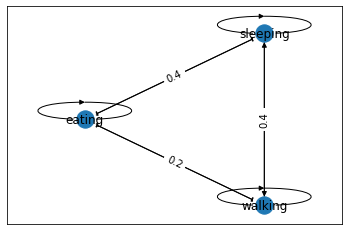

In [20]:

position = nx.drawing.nx_pydot.graphviz_layout(Graph, prog='dot')
nx.draw_networkx(Graph, position)

edge_labels = {(n1,n2):d['label'] for n1,n2,d in Graph.edges(data=True)}
nx.draw_networkx_edge_labels(Graph , position, edge_labels=edge_labels)
nx.drawing.nx_pydot.write_dot(Graph, 'my_markov.dot')

In [21]:
hidden_State = ['healthy','sick']
pi = [0.55,0.45]
state_space = pd.Series(pi , index = hidden_State,name = 'states')
print(state_space)
print('\n',state_space.sum())

healthy    0.55
sick       0.45
Name: states, dtype: float64

 1.0


In [22]:
a1_df = pd.DataFrame(columns=hidden_State,index = hidden_State)
a1_df.loc[hidden_State[0]] = [0.7,0.3]
a1_df.loc[hidden_State[1]] = [0.4,0.6]


In [23]:
a1_df

,healthy,sick
healthy,0.7,0.3
sick,0.4,0.6


In [24]:
def _get_marcov_edges(Q):
    edge={}
    for column in Q.columns:
        for index in Q.index:
            edge[(index,column)]=Q.loc[index,column]
            
    return edge

In [25]:
edge_wt1 = _get_marcov_edges(a1_df)
edge_wt1

{('healthy', 'healthy'): 0.7,
 ('sick', 'healthy'): 0.4,
 ('healthy', 'sick'): 0.3,
 ('sick', 'sick'): 0.6}

In [26]:
#use of .items returns key value pair in tuple and list of theta tuples
_get_marcov_edges(a1_df).items()

dict_items([(('healthy', 'healthy'), 0.7), (('sick', 'healthy'), 0.4), (('healthy', 'sick'), 0.3), (('sick', 'sick'), 0.6)])

In [27]:
#Creating the graph objects
Graph=nx.MultiDiGraph()

In [28]:
#Add state to graph
Graph.add_nodes_from(hidden_State)
print(f'Nodes:\n{Graph.nodes()}\n')

Nodes:
['healthy', 'sick']



In [29]:
from pprint import pprint

In [30]:
for k,v in edge_wt1.items():
    tmp_origin,tmp_destination=k[0],k[1]
    Graph.add_edge(tmp_origin,tmp_destination,weight=v,label=v)
print("Edges:")
pprint(Graph.edges(data=True))

Edges:
OutMultiEdgeDataView([('healthy', 'healthy', {'weight': 0.7, 'label': 0.7}), ('healthy', 'sick', {'weight': 0.3, 'label': 0.3}), ('sick', 'healthy', {'weight': 0.4, 'label': 0.4}), ('sick', 'sick', {'weight': 0.6, 'label': 0.6})])


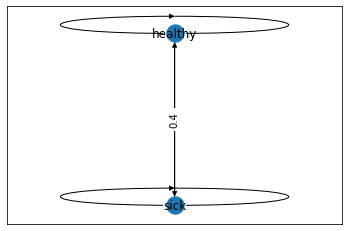

In [31]:
position = nx.drawing.nx_pydot.graphviz_layout(Graph, prog='dot')
nx.draw_networkx(Graph, position)

edge_labels = {(n1,n2):d['label'] for n1,n2,d in Graph.edges(data=True)}
nx.draw_networkx_edge_labels(Graph , position, edge_labels=edge_labels)
nx.drawing.nx_pydot.write_dot(Graph, 'my_markov.dot')